# Histograms

A histogram is a visual representation of the distribution of a continuous featur

+ For images, we can display the frequency of values for colors
+ Each of the three RGB channels have values between 0-255
+ We can plot these as 3 histograms on top of each other to see how much of each channel there is

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dark_horse = cv2.imread("../imgs/horse.jpg")               # BGR channels
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)   # RGB

rainbow = cv2.imread("../imgs/rainbow.jpg")                # BGR channels
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)    # RGB channels

blue_bricks = cv2.imread("../imgs/bricks.jpg")             # BGR channels
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB) # RGB channels

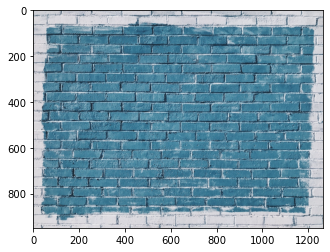

In [3]:
plt.imshow(show_bricks)

In [4]:
# Opencv BGR
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [5]:
hist_values.shape

(256, 1)

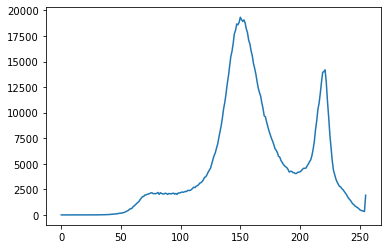

In [6]:
plt.plot(hist_values)

In [7]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [8]:
hist_values.shape

(256, 1)

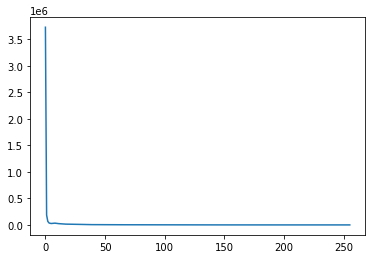

In [9]:
plt.plot(hist_values)

In [10]:
img = blue_bricks

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

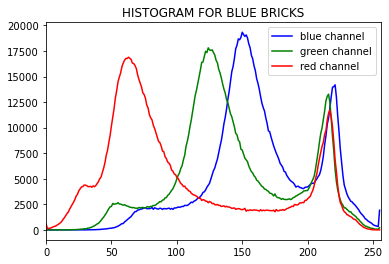

In [11]:
color = ("blue", "green", "red")

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col, label=col + " channel")
    plt.xlim([0,256])
    
plt.legend()
plt.title("HISTOGRAM FOR BLUE BRICKS")

In [12]:
img = dark_horse

Text(0.5, 1.0, 'HISTOGRAM FOR HORSE')

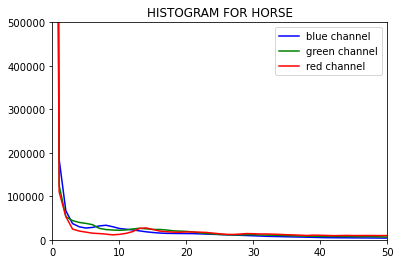

In [13]:
color = ("blue", "green", "red")

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col, label=col + " channel")
    plt.xlim([0,50])
    plt.ylim([0,500000])
    
plt.legend()
plt.title("HISTOGRAM FOR HORSE")

## Histogram Equalization

+ Histogram Equalization is a method of contrast adjustment based on the image's histogram

In [14]:
rainbow = cv2.imread("../imgs/rainbow.jpg")                # BGR channels
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)    # RGB channels

In [15]:
img = rainbow

In [16]:
img.shape

(550, 413, 3)

In [17]:
img.shape[0:2]

(550, 413)

In [18]:
mask = np.zeros(img.shape[0:2], dtype=np.uint8)

In [19]:
mask.shape

(550, 413)

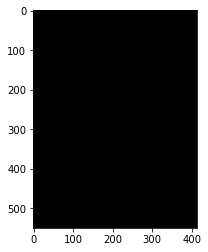

In [20]:
plt.imshow(mask, cmap="gray")

In [21]:
mask[300:400, 100:400] = 255

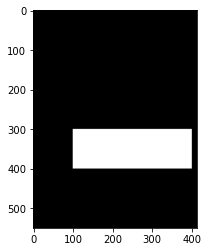

In [22]:
plt.imshow(mask, cmap="gray")

In [23]:
# img = rainbow
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [24]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

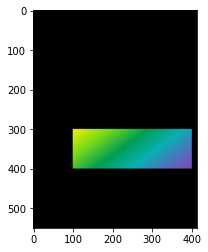

In [25]:
plt.imshow(show_masked_img)

In [26]:
hist_masked_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])

In [27]:
hist_values_red = cv2.calcHist([rainbow],mask=None, channels=[2], histSize=[256], ranges=[0,256])

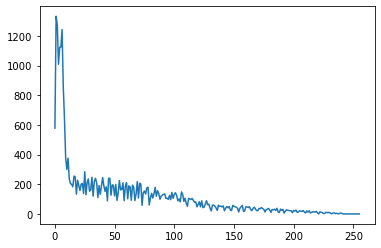

In [28]:
plt.plot(hist_masked_values_red)

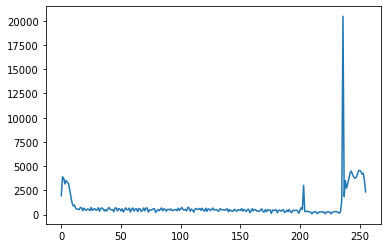

In [29]:
plt.plot(hist_values_red)

---

In [31]:
gorilla = cv2.imread("../imgs/gorilla.jpg")

In [35]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

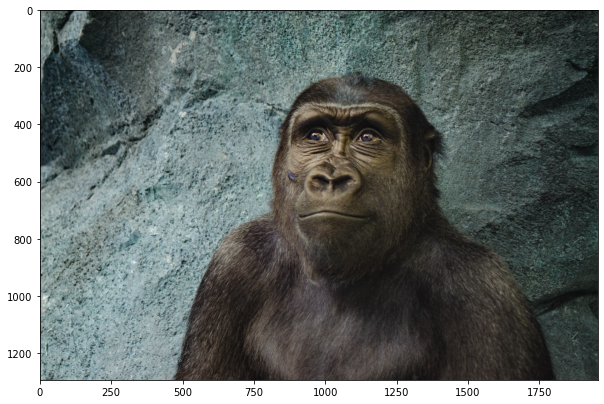

In [37]:
display_img(gorilla, cmap="gray")

In [38]:
gorilla.shape

(1295, 1955, 3)

In [39]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])

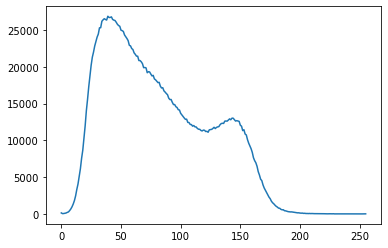

In [41]:
plt.plot(hist_values)